In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,NaN,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,NaN
1,0.029389,0.206580,0.48861,1.43430,3.12990,NaN,NaN,0.14333,1.19480,2.13180,NaN,3.844500
2,NaN,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,NaN,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,NaN,NaN,3.93810,3.734600
4,-0.268400,NaN,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,NaN,3.72580,3.70480,NaN,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,NaN,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,NaN,3.755600
397,NaN,-1.993300,1.32480,1.77210,2.55090,NaN,NaN,1.84110,3.47730,0.95496,1.52630,2.123800
398,NaN,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,NaN,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	79
float64		column 2	104
float64		column 3	39
float64		column 4	39
float64		column 5	78
float64		column 6	79
float64		column 7	92
float64		column 8	92
float64		column 9	53
float64		column 10	91
float64		column 11	92
float64		column 12	104


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,321.000000,296.000000,361.000000,361.000000,322.000000,321.000000,308.000000,308.000000,347.000000,309.000000,308.000000,296.000000
mean,-0.026782,-0.001535,2.013383,1.867048,1.929275,1.981563,2.083441,1.961712,1.980618,2.101616,2.022546,1.959617
std,2.404368,2.496222,1.104363,1.132038,1.124079,1.112195,1.102178,1.100417,1.125155,1.101959,1.116360,1.134369
min,-6.321100,-6.800500,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.090791,0.030430,0.008236
25%,-0.566760,-0.679775,1.125300,0.945100,0.942153,1.111200,1.171450,1.108150,1.082650,1.157300,1.063300,1.014445
50%,-0.054071,0.009048,2.063700,1.758500,1.906950,2.004600,2.125850,1.939100,2.065300,2.195700,1.982800,1.925400
75%,0.712730,0.691105,2.888400,2.775400,2.874725,2.946500,2.958150,2.877150,2.933050,3.040000,2.950000,2.869575
max,7.273800,6.777100,3.951500,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

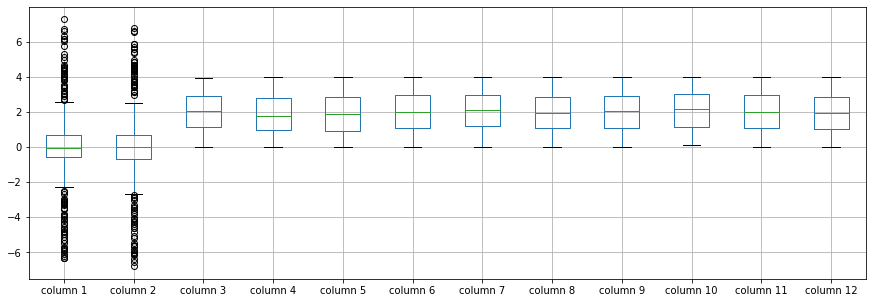

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.026782
column 2    -0.001535
column 3     2.013383
column 4     1.867048
column 5     1.929275
column 6     1.981563
column 7     2.083441
column 8     1.961712
column 9     1.980618
column 10    2.101616
column 11    2.022546
column 12    1.959617
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.062250,-0.021523,-0.066531,0.006013,-0.033057,-0.010854,0.052372,0.033019,0.057217,0.117858,-0.042704
column 2,-0.062250,1.000000,-0.006398,0.034031,-0.046641,-0.177297,0.009227,-0.085054,-0.083897,0.067971,0.023145,-0.021758
column 3,-0.021523,-0.006398,1.000000,0.033041,-0.022367,-0.078698,-0.065460,0.048034,0.114475,0.023762,-0.039073,0.013268
column 4,-0.066531,0.034031,0.033041,1.000000,0.013494,0.037991,-0.080197,0.064045,-0.021164,0.114450,-0.018201,-0.008509
column 5,0.006013,-0.046641,-0.022367,0.013494,1.000000,0.049700,0.064660,-0.018093,-0.048963,0.012567,-0.052152,0.026166
column 6,-0.033057,-0.177297,-0.078698,0.037991,0.049700,1.000000,-0.008105,0.004121,0.031862,-0.002416,-0.033558,-0.025308
column 7,-0.010854,0.009227,-0.065460,-0.080197,0.064660,-0.008105,1.000000,-0.058535,0.060275,0.046522,-0.060363,-0.131609
column 8,0.052372,-0.085054,0.048034,0.064045,-0.018093,0.004121,-0.058535,1.000000,-0.023383,-0.142179,-0.112198,-0.001136
column 9,0.033019,-0.083897,0.114475,-0.021164,-0.048963,0.031862,0.060275,-0.023383,1.000000,0.033344,-0.009694,0.046581
column 10,0.057217,0.067971,0.023762,0.114450,0.012567,-0.002416,0.046522,-0.142179,0.033344,1.000000,0.015565,0.062815


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+35,12+35+35,12+35+35+35,12+35+35+35+35,12+35+35+35+35+35,12+35+35+35+35+35+35,12+35+35+35+35+35+35+35,12+35+35+35+35+35+35,12+35+35+35+35+35,12+35+35+35+35,12+35+35+35,12+35+35,12+35,12], vae_layer = False, seed = 35)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 21.909734954833983
Epoch: 1 , loss: 21.898177642822265
Epoch: 2 , loss: 21.786298751831055
Epoch: 3 , loss: 21.541251678466796
Epoch: 4 , loss: 20.10863929748535
Epoch: 5 , loss: 18.29162712097168
Epoch: 6 , loss: 17.977446670532228
Epoch: 7 , loss: 17.407368621826173
Epoch: 8 , loss: 17.32377758026123
Epoch: 9 , loss: 17.53571632385254
Epoch: 10 , loss: 17.234732360839843
Epoch: 11 , loss: 16.861437759399415
Epoch: 12 , loss: 16.678738250732422
Epoch: 13 , loss: 16.76073776245117
Epoch: 14 , loss: 16.764154663085936
Epoch: 15 , loss: 16.3364453125
Epoch: 16 , loss: 16.30959743499756
Epoch: 17 , loss: 16.188887672424315
Epoch: 18 , loss: 16.19411251068115
Epoch: 19 , loss: 15.781664886474609
Epoch: 20 , loss: 15.805053901672363
Epoch: 21 , loss: 16.058244667053224
Epoch: 22 , loss: 15.722003555297851
Epoch: 23 , loss: 15.476282119750977
Epoch: 24 , loss: 15.434785652160645
Epoch: 25 , loss: 15.62999378

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.705950
column 2     0.128930
column 3     1.058100
column 4     2.136200
column 5     2.148600
column 6     2.245800
column 7     0.552997
column 8     0.510253
column 9     1.943500
column 10    1.987000
column 11    2.470700
column 12    0.503520
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,-0.043312,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.122429
1,0.000000,0.000000,0.00000,0.0,0.00000,-0.317251,-0.403938,0.0,0.000000,0.000000,0.030132,0.000000
2,1.092680,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.0,-3.017666,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.558585,-1.884838,0.000000,0.000000
4,0.000000,0.995313,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,4.700796,0.00000,0.0,0.39353,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
396,0.000000,0.000000,-2.90324,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,-2.346608,0.000000
397,3.474535,0.000000,0.00000,0.0,0.00000,0.920425,1.600695,0.0,0.000000,0.000000,0.000000,0.000000
398,-7.294643,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,-2.788823,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(62.31025559478781, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.38162889066493977

In [18]:
new_df.iloc[66,:]

column 1     0.005553
column 2    -0.008317
column 3     0.403430
column 4     1.187200
column 5     3.956600
column 6     2.583000
column 7     2.830600
column 8     3.074200
column 9     1.538100
column 10    0.246200
column 11    0.853340
column 12    0.612543
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,-0.000827,1.97890,1.83630,2.88660,2.469600,0.215410,3.09000,0.783430,0.510350,0.030430,0.223089
1,0.029389,0.206580,0.48861,1.43430,3.12990,0.960549,1.024562,0.14333,1.194800,2.131800,1.014862,3.844500
2,-0.022720,0.217560,1.61050,1.33710,3.76820,1.210000,3.996300,2.21730,0.885234,1.514400,2.438900,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.567160,1.660100,2.35270,1.219845,1.250262,3.938100,3.734600
4,-0.268400,-0.010687,2.88220,1.56160,3.20140,3.377400,1.522600,0.98475,3.109400,3.656400,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-0.028404,3.72580,3.70480,1.27622,0.354060,1.627800,3.29400,1.085000,0.157400,0.465040,2.851400
396,0.264630,-6.107600,1.00216,1.33770,1.41870,1.686100,1.095100,3.79360,0.127900,0.542490,1.019192,3.755600
397,-0.004565,-1.993300,1.32480,1.77210,2.55090,2.390525,2.526095,1.84110,3.477300,0.954960,1.526300,2.123800
398,-0.001643,-0.411470,2.49480,0.39655,2.99900,3.410100,2.951600,0.27800,0.990590,0.648577,1.816200,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NE_20(imp).xlsx", index=False, header=False)